In [20]:
import kagglehub
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import numpy as np

In [21]:
path = kagglehub.dataset_download("tomasfern/oxford-iit-pets")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\LG\.cache\kagglehub\datasets\tomasfern\oxford-iit-pets\versions\1


In [22]:
from os import listdir
from os.path import isfile, join

base_path = Path(path)
images_path = base_path / "images" / "images"
annotations_path = base_path / "annotations"/ "annotations"

xml_path = annotations_path  / "xmls"
samples_name = [Path(f).stem for f in listdir(xml_path) if isfile(join(xml_path, f))]

In [23]:
def get_sample(file_name):

    img1_path = images_path  / f"{file_name}.jpg"
    img2_path = annotations_path  / "trimaps" / f"{file_name}.png"
    xml_path = annotations_path  / "xmls" / f"{file_name}.xml"

    image = np.asarray(Image.open(img1_path))
    mask = np.asarray(Image.open(img2_path))

    with open(xml_path, 'r') as f:
        data = f.read()
    data = BeautifulSoup(data, "xml")
    info = {k : int(data.find(k).text) for k in ['xmin','xmax','ymin','ymax','width','height']}

    return {'image': image, 'mask': mask, 'info': info}

samples = {f:get_sample(f) for f in samples_name}

# Data exploration

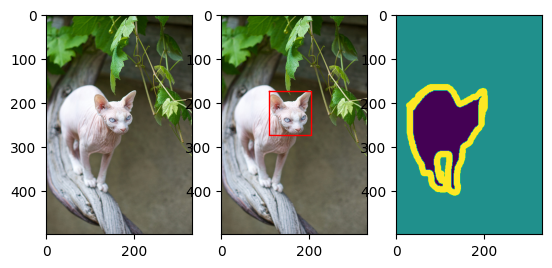

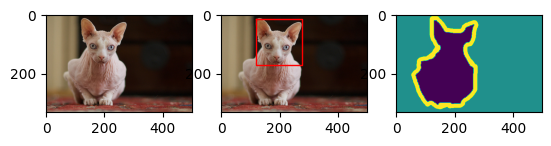

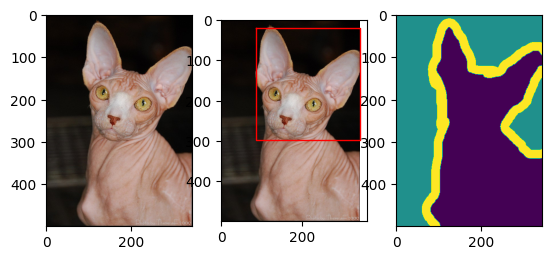

In [24]:
def show_samples(files):
    
    for i, file_name in enumerate(files):

        sample = samples[file_name]

        data = sample['info']
        
        plt.subplot(1, 3, 1)
        plt.imshow(sample['image'])

        plt.subplot(1, 3, 2)
        plt.imshow(sample['image'])

        x = [data['xmin'], data['xmin'], data['xmax'], data['xmax'], data['xmin']]
        y = [data['ymin'], data['ymax'], data['ymax'], data['ymin'], data['ymin']]

        plt.plot(x, y, color="red", linewidth=1)

        plt.subplot(1, 3, 3)
        plt.imshow(sample['mask'])

        plt.show()

files = [f"Sphynx_20{i}" for i in [3,5,6]]
show_samples(files)

# axes
# rgb + numpy


In [25]:
print(samples_name[0:10])
print(len(samples_name))

['Abyssinian_1', 'Abyssinian_10', 'Abyssinian_100', 'Abyssinian_101', 'Abyssinian_102', 'Abyssinian_103', 'Abyssinian_105', 'Abyssinian_106', 'Abyssinian_107', 'Abyssinian_108']
3686


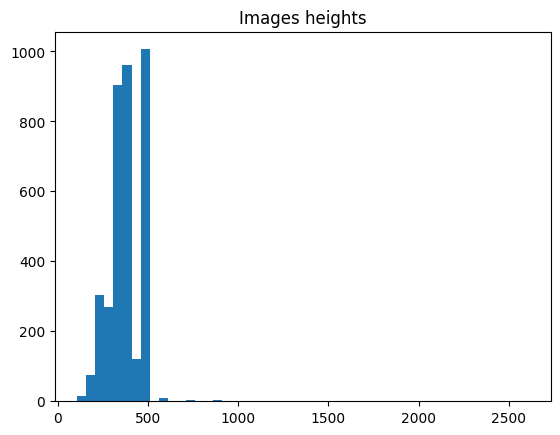

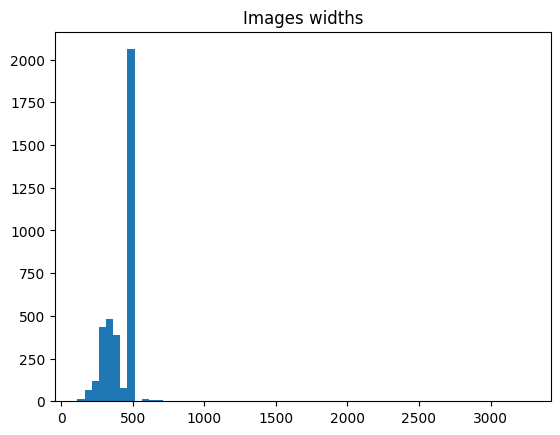

In [ ]:
def plot_histogram(title, data, step = 50):
    bins = np.arange(min(data), max(data) + 10, step)
    plt.hist(data, bins=bins)
    plt.title(title)
    plt.show()

heights = [value['info']['height'] for value in samples.values()]
widths = [value['info']['width'] for value in samples.values()]

plot_histogram("Images heights", heights)
plot_histogram("Images widths", widths)

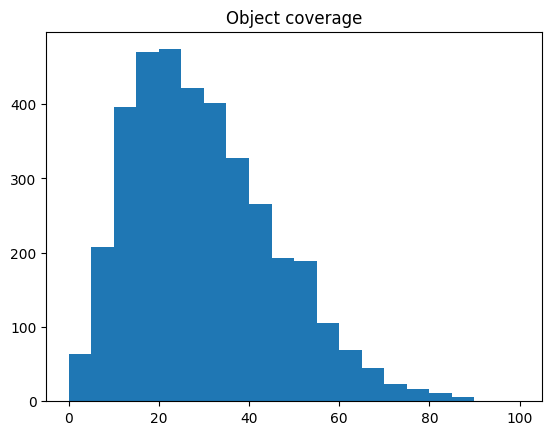

In [55]:
coverages = [(np.sum(s['mask'] == 1) / (s['info']['height'] * s['info']['width'])) * 100 for s in samples.values()]

plot_histogram("Object coverage", coverages, step = 5)

In [ ]:
mean_object_brightness = 
mean_background_brightness = 